<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First CNN with Dropout**



1.   Conv2D + Relu + Maxpool
2.   Conv2D + Relu +   Maxpool
3.   Conv2D + Relu + Maxpool
4.   Dense
5.   Dropout(0.5)



**Loading the CIFAR10 set**

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

**Preparing data**

Training/Validation 80%/20%


In [0]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

**Compiling the model**

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

**Training the network**

In [0]:
history = model.fit(train_images,
          train_labels,
          batch_size=128,
          epochs = 10,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 73s 2ms/step - loss: 1.8351 - acc: 0.3333 - val_loss: 1.6175 - val_acc: 0.4149
Epoch 2/10
40000/40000 [==============================] - 69s 2ms/step - loss: 1.4809 - acc: 0.4722 - val_loss: 1.3159 - val_acc: 0.5262
Epoch 3/10
40000/40000 [==============================] - 69s 2ms/step - loss: 1.3307 - acc: 0.5258 - val_loss: 1.2994 - val_acc: 0.5465
Epoch 4/10
40000/40000 [==============================] - 69s 2ms/step - loss: 1.2262 - acc: 0.5669 - val_loss: 1.1431 - val_acc: 0.5996
Epoch 5/10
40000/40000 [==============================] - 70s 2ms/step - loss: 1.1411 - acc: 0.5959 - val_loss: 1.1137 - val_acc: 0.6110
Epoch 6/10
40000/40000 [==============================] - 70s 2ms/step - loss: 1.0771 - acc: 0.6213 - val_loss: 1.0352 - val_acc: 0.6263
Epoch 7/10
40000/40000 [==============================] - 69s 2ms/step - loss: 1.0232 - acc: 0.6390 - val_loss: 0.9445 - val_acc

**Plotting the model**

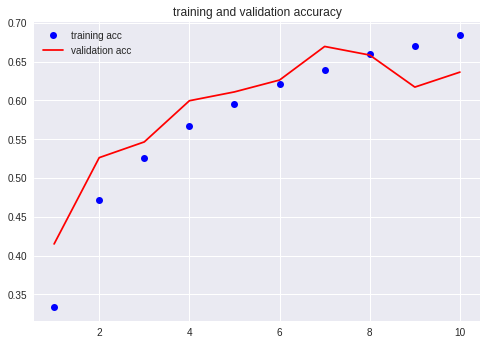

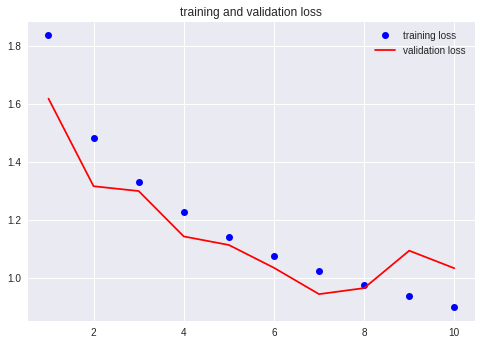

In [0]:
#@title
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', 
         label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')

plt.legend()

plt.show()

**Evaluate the model with validation set**



In [0]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 1.033653085231781
Validation accuracy: 63.65 %
